In [57]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import quandl

#  Get attendees to get their own key.
quandl.ApiConfig.api_key = 'gYyp7CLTPWqhbsyFNAN2'


# Get the data from Quandl for these stock
data = quandl.get_table('WIKI/PRICES', ticker='AAPL',qopts={'columns': ['ticker', 'date','Open', 'High', 'Low', 'Close', 'Volume', 'split_ratio', 'adj_open', 'adj_high', 'adj_low', 'adj_close', 'adj_volume']},
date = {'gte': '2000-1-3', 'lte': '2017-12-29'},
paginate=True
)

# Check the data, what's it look like?

data.head()
table = data.set_index('date')
clean = table.pivot(columns='ticker')

df2 = data.sort_values(by='date')
df2 = df2.set_index('date')
df2.drop(columns='ticker', inplace=True)
df2.rename(columns={'open':'Open', 'high': 'High', 'low': 'Low',
 'close': 'Close', 'volume': 'Volume', 'split_ratio': 'SplitRatio',
  'adj_open': 'AdjOpen', 'adj_high': 'AdjHigh', 'adj_low': 'AdjLow', 
  'adj_close': 'AdjClose', 'adj_volume': 'AdjVolume'}, inplace=True)
df2.insert(5, 'ExDividend', 0.00, True)
df2.head()





,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
date,,,,,,,,,,,,
2000-01-03,104.87,112.50,101.69,111.94,4783900.0,0.0,1.0,3.369314,3.614454,3.267146,3.596463,133949200.0
2000-01-04,108.25,110.62,101.19,102.50,4574800.0,0.0,1.0,3.477908,3.554053,3.251081,3.293170,128094400.0
2000-01-05,103.75,110.56,103.00,104.00,6949300.0,0.0,1.0,3.333330,3.552125,3.309234,3.341362,194580400.0
2000-01-06,106.12,107.00,95.00,95.00,6856900.0,0.0,1.0,3.409475,3.437748,3.052206,3.052206,191993200.0
2000-01-07,96.50,101.00,95.50,99.50,4113700.0,0.0,1.0,3.100399,3.244977,3.068270,3.196784,115183600.0


In [59]:
df2['30d mavg'] = df2['AdjClose'].rolling(window=21).mean()
df2['30d std'] = df2['AdjClose'].rolling(window=21).std()
df2['Upper Band'] = df2['30d mavg'] + (df2['30d std'] * 2)
df2['Lower Band'] = df2['30d mavg'] - (df2['30d std'] * 2)

<AxesSubplot:xlabel='date'>

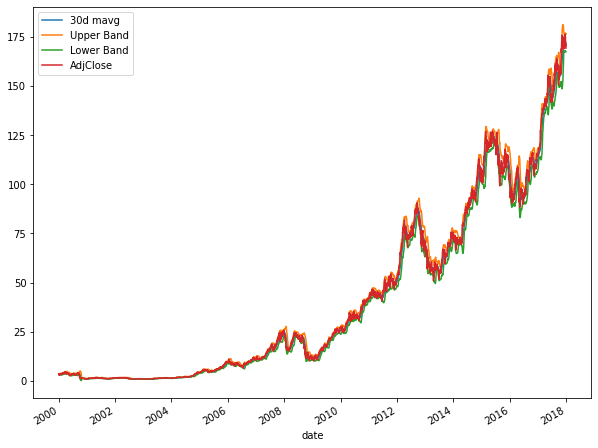

In [60]:
cols = ['30d mavg', 'Upper Band', 'Lower Band', 'AdjClose']
df2[cols].plot(figsize=(10,8))

<AxesSubplot:xlabel='date'>

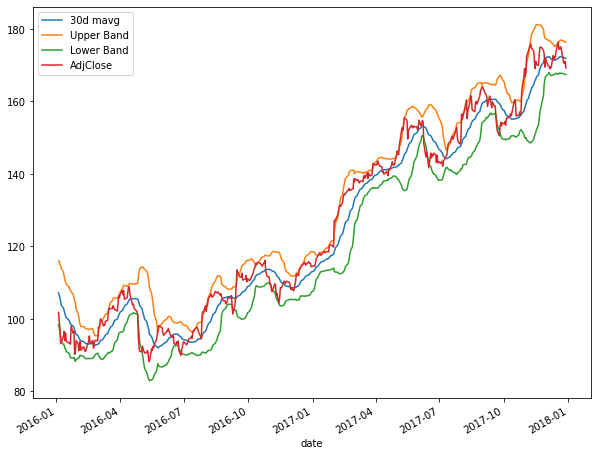

In [61]:
df2['2016':][cols].plot(figsize=(10,8))

No handles with labels found to put in legend.


[]

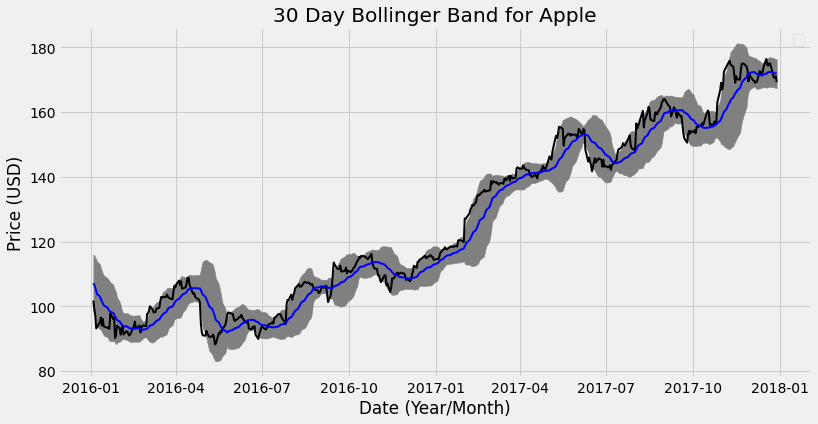

In [62]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

x_axis = df2['2016':].index.get_level_values(0)

ax.fill_between(x_axis, df2['2016':]['Upper Band'], 
                df2['2016':]['Lower Band'], color='grey')

ax.plot(x_axis, df2['2016':]['AdjClose'],  color='black', lw=2)
ax.plot(x_axis, df2['2016':]['30d mavg'], color='blue', lw=2)

ax.set_title('30 Day Bollinger Band for Apple')
ax.set_xlabel('Date (Year/Month)')
ax.set_ylabel('Price (USD)')
ax.legend()
ax.plot()

No handles with labels found to put in legend.


[]

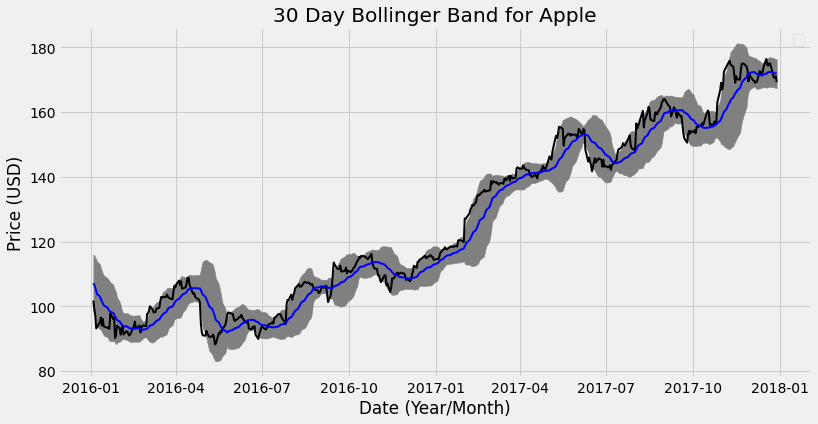

In [63]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

x_axis = df2['2016':].index.get_level_values(0)

ax.fill_between(x_axis, df2['2016':]['Upper Band'], 
                df2['2016':]['Lower Band'], color='grey')

ax.plot(x_axis, df2['2016':]['AdjClose'],  color='black', lw=2)
ax.plot(x_axis, df2['2016':]['30d mavg'], color='blue', lw=2)

ax.set_title('30 Day Bollinger Band for Apple')
ax.set_xlabel('Date (Year/Month)')
ax.set_ylabel('Price (USD)')
ax.legend()
ax.plot()


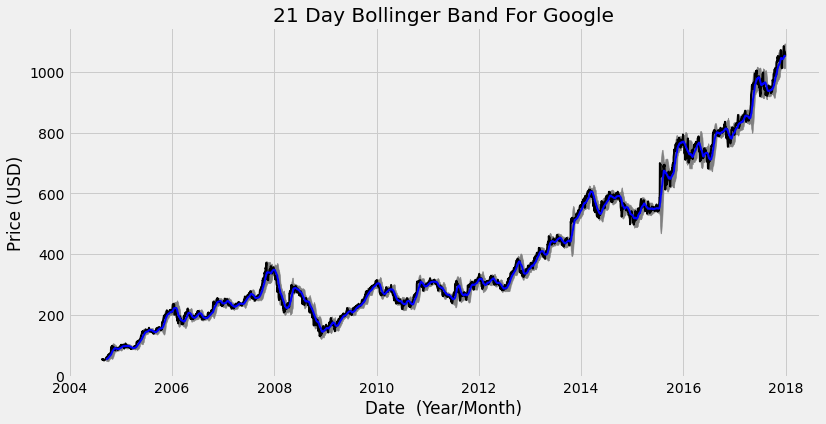

In [67]:
def plotBollBand(selected, securityName, attribute = 'AdjClose', 
                 window=21, start=None, end=None):
    quandl.ApiConfig.api_key = 'gYyp7CLTPWqhbsyFNAN2'


    # Get the data from Quandl for these stock
    data = quandl.get_table('WIKI/PRICES', ticker=selected,qopts={'columns': ['ticker', 'date','Open',          'High', 'Low', 'Close', 'Volume', 'split_ratio', 'adj_open', 'adj_high', 'adj_low', 'adj_close',            'adj_volume']},
    date = {'gte': '2000-1-3', 'lte': '2017-12-29'},
    paginate=True
    )

    # Check the data, what's it look like?

    data.head()
    table = data.set_index('date')
    clean = table.pivot(columns='ticker')

    df = data.sort_values(by='date')
    df = df.set_index('date')
    df.drop(columns='ticker', inplace=True)
    df.rename(columns={'open':'Open', 'high': 'High', 'low': 'Low',
    'close': 'Close', 'volume': 'Volume', 'split_ratio': 'SplitRatio',
    'adj_open': 'AdjOpen', 'adj_high': 'AdjHigh', 'adj_low': 'AdjLow', 
    'adj_close': 'AdjClose', 'adj_volume': 'AdjVolume'}, inplace=True)
    df.insert(5, 'ExDividend', 0.00, True)
    df.head()

    
    # df = pd.read_csv(filepath_or_buffer = file, index_col = 'Date', 
    #                  parse_dates=True)
    # df = df.sort_values(by='Date', ascending=True)
    
    
    mavgCol = str(window) + 'd mvag'
    stdCol = str(window) + 'd std'
    
    df[mavgCol] = df[attribute].rolling(window=window).mean()
    df[stdCol] = df[attribute].rolling(window=window).std()
    df['Upper Band'] = df[mavgCol] + (df[stdCol] * 2)
    df['Lower Band'] = df[mavgCol] - (df[stdCol] * 2)
    
    plt.style.use('fivethirtyeight')
    fig = plt.figure(figsize=(12,6))
    ax = fig.add_subplot(111)
    
    x_axis = df[start:end].index.get_level_values(0)
    ax.fill_between(x_axis, df[start:end]['Upper Band'], 
                            df[start:end]['Lower Band'], color='grey')
    
    ax.plot(x_axis, df[start:end][attribute], color='black', lw=2)
    ax.plot(x_axis, df[start:end][mavgCol], color='blue', lw=2)
    
    title = str(window) + ' Day Bollinger Band For ' + securityName
    ax.set_title(title)
    ax.set_xlabel('Date  (Year/Month)')
    ax.set_ylabel('Price (USD)')
    plt.show()
plotBollBand(selected='GOOGL', securityName='Google')

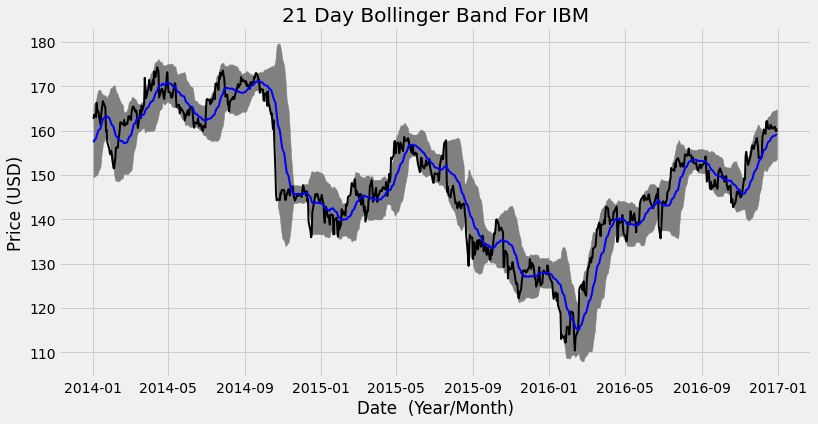

In [70]:
plotBollBand(selected='IBM', securityName='IBM', start='2014', end='2016')

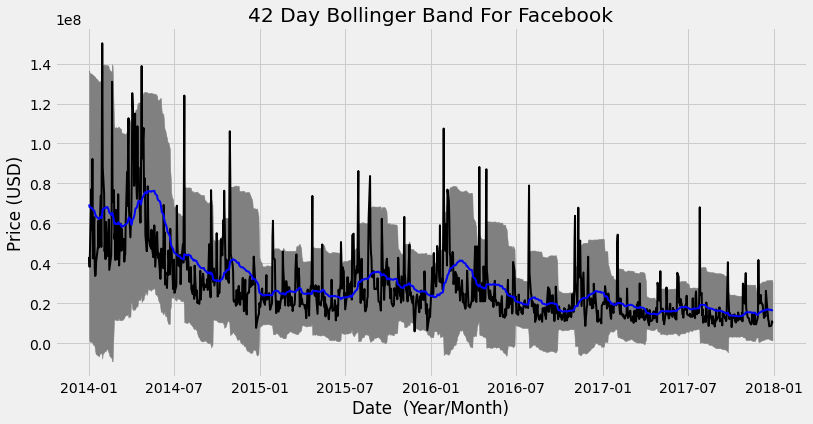

In [71]:
plotBollBand(selected='FB', securityName='Facebook', start='2014', window=42, attribute='AdjVolume')